![image info](https://ineuron.ai/images/ineuron-logo.png)

### Missing values approaches

* Check for Missing data
* Drop NA Values
* MEAN/MEDAIN Imputation
* Random sample imputation

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/google_cleaned.csv')

**Show Top 5 Records**

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
4664,U-Disco,FAMILY,3.6,906,0.196,100000,Free,0.0,Everyone,Entertainment,2014-02-05,1.7.3,2.3 and up,5,2,2014
6326,"Real Casino:Slot,Keno,BJ,Poker",GAME,4.1,341,26.000,50000,Free,0.0,Teen,Casino,2016-08-12,1.18,4.0 and up,12,8,2016
2095,Farming Simulator 14,FAMILY,4.5,530904,51.000,10000000,Free,0.0,Everyone,Simulation;Action & Adventure,2017-07-17,1.4.4,2.3.3 and up,17,7,2017
1351,The Bump Pregnancy Tracker,HEALTH_AND_FITNESS,4.6,20301,22.000,1000000,Free,0.0,Everyone,Health & Fitness,2018-05-16,3.22,4.3 and up,16,5,2018
8545,DM for IG 😘 - Image & Video Saver for Instagram,SOCIAL,3.7,55,3.700,5000,Free,0.0,Teen,Social,2018-03-03,3.20.3,4.4 and up,3,3,2018


### 1. Check for Missing data

In [4]:
null_df = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


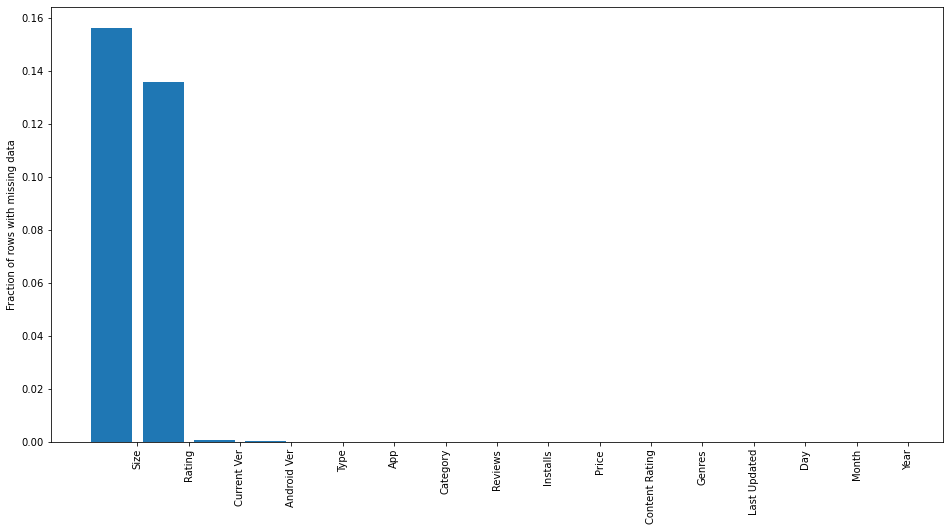

In [5]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

### 2. Drop NA Values

In [6]:
df_copy = df.copy()

In [7]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [8]:
drop_df = df_copy[cols].dropna()
drop_df

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.000,Free,1.0.0,4.0.3 and up
1,3.9,14.000,Free,2.0.0,4.0.3 and up
2,4.7,8.700,Free,1.2.4,4.0.3 and up
3,4.5,25.000,Free,Varies with device,4.2 and up
4,4.3,2.800,Free,1.1,4.4 and up
...,...,...,...,...,...
10832,4.8,0.619,Free,0.8,2.2 and up
10833,4.0,2.600,Free,1.0.0,4.1 and up
10835,4.5,53.000,Free,1.48,4.1 and up
10836,5.0,3.600,Free,1.0,4.1 and up


In [9]:
df_copy.shape, drop_df.shape

((10840, 16), (7723, 5))

<Figure size 432x288 with 0 Axes>

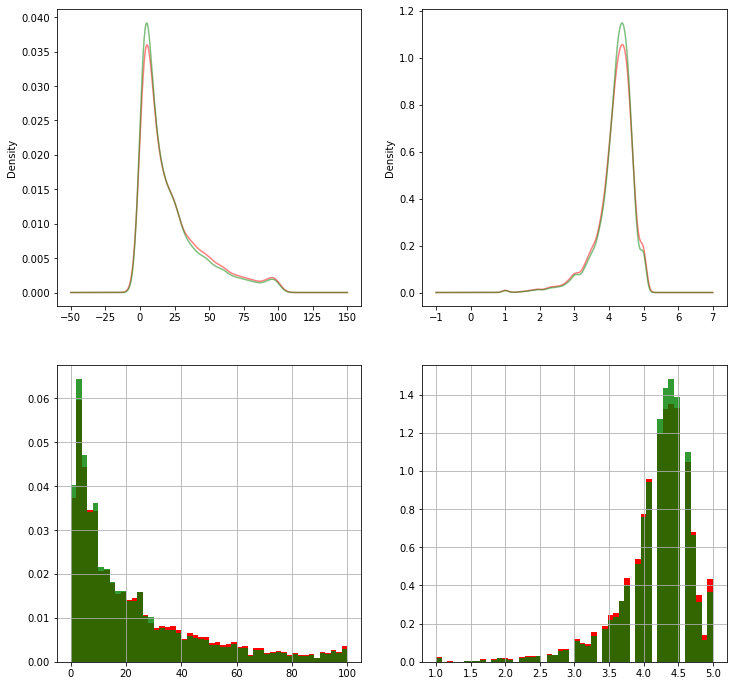

In [10]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
drop_df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
drop_df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
drop_df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

#### Insights
-As we can observe from above plots
- Drop NA Technique is changing our distribution pattern
- So we reject Drop NA Technique

### 3. MEAN/MEDAIN Imputation

In [11]:
df_copy_me_mo = df.copy()

In [12]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())
df_copy_me_mo['median_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median())
df_copy_me_mo['mean_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].mean())
df_copy_me_mo['median_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].median())

In [13]:
print('Original Size Variance', df_copy_me_mo['Size'].var())
print('Size Variance After mean imputation', df_copy_me_mo['mean_Size'].var())
print('Size Variance After median imputation', df_copy_me_mo['median_Size'].var())

Original Size Variance 510.5801557864865
Size Variance After mean imputation 430.7357638630519
Size Variance After median imputation 440.28217654605237


In [14]:
print('Original Rating Variance', df_copy_me_mo['Rating'].var())
print('Rating Variance After mean imputation', df_copy_me_mo['mean_Rating'].var())
print('Rating Variance After median imputation', df_copy_me_mo['median_Rating'].var())

Original Rating Variance 0.26545047227541496
Rating Variance After mean imputation 0.22935175503821595
Rating Variance After median imputation 0.23072842363353122


#### Insights
- As we can observe Variance is distorted after both mean and median imputation

<Figure size 432x288 with 0 Axes>

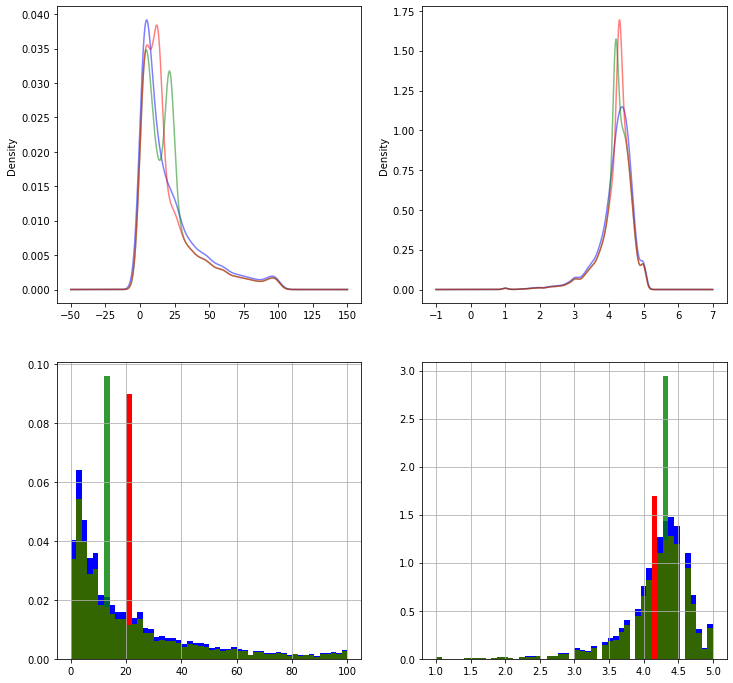

In [15]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df_copy_me_mo['Size'].plot.density(color='blue',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy_me_mo['mean_Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='mean_Size')
df_copy_me_mo['median_Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='median_Size')

df_copy_me_mo['Rating'].plot.density(color='blue',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy_me_mo['mean_Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='mean_Rating')
df_copy_me_mo['median_Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='median_Rating')

df_copy_me_mo['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)

df_copy_me_mo['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)


plt.show()

#### Insights
-As we can observe from above plots
- Mean and median imputation Technique is changing our distribution pattern.
- So we will reject mean and median imputation Technique also.

### 4. Random Sample Imputation

In [16]:
df_random = df.copy()

In [17]:
def Random_Sample_imputation(feature):
    random_sample=df_random[feature].dropna().sample(df_random[feature].isnull().sum())               
    random_sample.index=df_random[df_random[feature].isnull()].index
    df_random.loc[df_random[feature].isnull(),feature]=random_sample

In [18]:
for col in df_random:
    Random_Sample_imputation(col)

In [19]:
print('Original Size Variance', df['Size'].var())
print('Size Variance After Random imputation', df_random['Size'].var())

Original Size Variance 510.5801557864865
Size Variance After Random imputation 514.1553106613144


In [20]:
print('Original Size Variance', df['Rating'].var())
print('Size Variance After Rating imputation', df_random['Rating'].var())

Original Size Variance 0.26545047227541496
Size Variance After Rating imputation 0.2629207476997208


<Figure size 432x288 with 0 Axes>

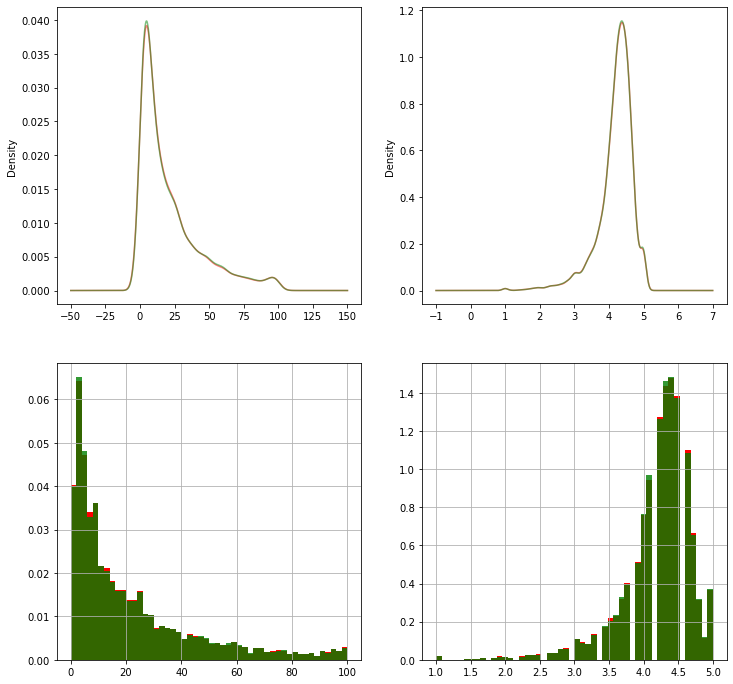

In [21]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_random['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_random['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_random['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_random['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

In [22]:
null_df = pd.DataFrame({'Null Values' : df_random.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_random.isna().sum().sort_values(ascending=False)) / (df_random.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


#### Insights
-As we can observe from above plots
- Random Sample imputation Technique has no impact on distribution pattern.
- So we will accept Random Sample imputation Technique .

In [23]:
num_features=[col for col in df_random.columns if df_random[col].dtype!='O']
num_df = df_random[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [25]:
df_random.to_csv('data/google_missing_imputed.csv', index = False)